# System Identification With Python

I need to analyse some data. This is part of that analysis.

Would You Like To Know More: 

- https://www.youtube.com/watch?v=9itsq4_qNZo
- http://lpsa.swarthmore.edu/Transient/TransInputs/TransStep.html
- https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-iii-fourier-series-and-laplace-transform/unit-step-and-unit-impulse-response/MIT18_03SCF11_s25_2text.pdf
- http://web.mit.edu/2.151/www/Handouts/FirstSecondOrder.pdf


## Part 1: Generate Fake Data

To identify data we need to have some known data to identify.

In [10]:
# Parallel Path.
import control.matlab
from scipy import signal
import numpy as np
import matplotlib
%matplotlib inline

### First Order System

In [11]:
K = 1
tau = 1
dT = 1e-2

In [12]:
sys1 = control.matlab.tf(K, [tau, 1])
sys2 = signal.lti(K, [tau, 1])

In [13]:
T = np.arange(0, tau*10, dT)

Y1, T1 = control.matlab.step(sys1, T=T)
T2a, Y2a = signal.step(sys2, T=T)
T2b, Y2b = signal.step2(sys2, T=T)

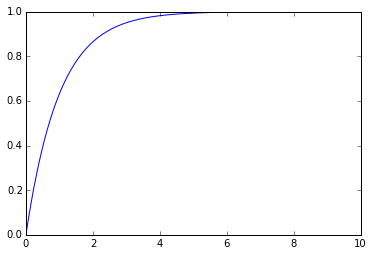

In [14]:
matplotlib.pyplot.plot(T1,Y1)

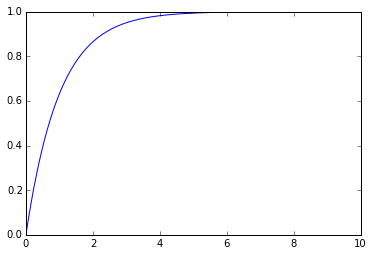

In [15]:
matplotlib.pyplot.plot(T2a,Y2a)

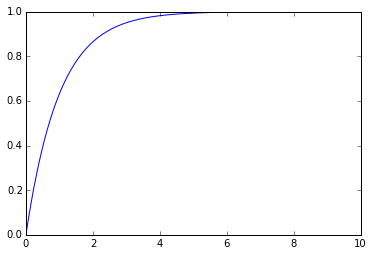

In [16]:
matplotlib.pyplot.plot(T2b,Y2b)

### Part 2: Analyze Fake Data

In [18]:
X_0 = 0
X_final = 1

Y_0 = Y1[0]
Y_final = Y1[-1]

In [19]:
K_est = Y_final / X_final

In [22]:
tau_est = list()
for i in range(1,4):
    Y_ = (1-np.exp(-i))*(Y_final-Y_0)
    idx1 = np.where(Y_>=Y1)[0][-1]
    idx2 = np.where(Y_<=Y1)[0][0]
    
    tau_est.append(T1[idx1]/i)
    tau_est.append(T1[idx2]/i)
tau_est = np.mean(tau_est)
print(tau_est)

0.996944444444


In [24]:
def pct_err(experimental, theoretical):
    return np.abs((experimental-theoretical)/theoretical) * 100
def pct_err2(Approximate, Exact):
     return np.abs((Approximate - Exact)/Exact) * 100

In [29]:
pct_err(tau_est, tau)

0.30555555555555891

In [30]:
pct_err(K_est, K)

0.0045856206642103103